__やりたいこと__

月曜から木曜までの情報をもとに金曜日の始値が上がるか下がるかの予測モデルを作成

https://kino-code.com/python-stock-price/


In [115]:
import pandas as pd

In [116]:
df = pd.read_csv("../data/finance_dataset.csv")
df

,Date,High,Low,Open,Close
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13967 non-null  object 
 1   High    13967 non-null  float64
 2   Low     13967 non-null  float64
 3   Open    13967 non-null  float64
 4   Close   13967 non-null  float64
dtypes: float64(4), object(1)
memory usage: 545.7+ KB


In [118]:
df.describe()

,High,Low,Open,Close
count,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04
mean,1.204933e+06,1.191816e+06,1.198654e+06,1.198359e+06
std,7.543271e+05,7.448026e+05,7.497982e+05,7.495987e+05
min,9.439532e+04,9.439532e+04,9.439532e+04,9.439532e+04
25%,5.651435e+05,5.651435e+05,5.651435e+05,5.651435e+05
50%,1.105094e+06,1.093646e+06,1.099565e+06,1.099436e+06
75%,1.741256e+06,1.718093e+06,1.731766e+06,1.729974e+06
max,3.603563e+06,3.591563e+06,3.600252e+06,3.599718e+06


In [119]:
#object型からdatetime型に変換
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13967 non-null  datetime64[ns]
 1   High    13967 non-null  float64       
 2   Low     13967 non-null  float64       
 3   Open    13967 non-null  float64       
 4   Close   13967 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 545.7 KB


In [120]:
df["weekday"] = df["Date"].dt.weekday
df

,Date,High,Low,Open,Close,weekday
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,2
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,3
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,4
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,1
...,...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,4
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,2


In [121]:
from datetime import  datetime
from datetime import timedelta
start = datetime(1965, 1, 4)
#四捨五入して割り算
df["weeks"] = (df["Date"] - start) // timedelta(weeks = 1)
df

,Date,High,Low,Open,Close,weekday,weeks
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,0
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,2,0
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,3,0
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,4,0
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,1,1
...,...,...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,4,2962
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0,2963
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,2963
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,2,2963


In [122]:
df = df[["Date", "weeks","weekday", "High", "Low", "Open", "Close"]]
df

,Date,weeks,weekday,High,Low,Open,Close
0,1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1,1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
2,1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
3,1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
4,1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...,...,...
13962,2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2963,2,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


In [123]:
df.set_index(keys = "Date", inplace = True)
df.sort_values(by = "Date", ascending = True, inplace = True)
print(df)

            weeks  weekday          High           Low          Open  \
Date                                                                   
1965-01-05      0        1  1.163391e+05  1.163391e+05  1.163391e+05   
1965-01-06      0        2  1.169191e+05  1.169191e+05  1.169191e+05   
1965-01-07      0        3  1.178700e+05  1.178700e+05  1.178700e+05   
1965-01-08      0        4  1.189948e+05  1.189948e+05  1.189948e+05   
1965-01-12      1        1  1.191900e+05  1.191900e+05  1.191900e+05   
...           ...      ...           ...           ...           ...   
2021-10-15   2962        4  2.690117e+06  2.657175e+06  2.662822e+06   
2021-10-18   2963        0  2.695851e+06  2.675507e+06  2.691178e+06   
2021-10-19   2963        1  2.707705e+06  2.689472e+06  2.693348e+06   
2021-10-20   2963        2  2.727743e+06  2.703065e+06  2.718200e+06   
2021-10-21   2963        3  2.702926e+06  2.658233e+06  2.696628e+06   

                   Close  
Date                      
1965-01-0

C:\Users\javie\AppData\Local\Temp\ipykernel_25904\3917712270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "Date", ascending = True, inplace = True)


In [124]:
#1日分だけ上にずらしたデータを作成
df_shift = df.shift(-1)
df_shift

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0.0,2.0,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
1965-01-06,0.0,3.0,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
1965-01-07,0.0,4.0,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
1965-01-08,1.0,1.0,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
1965-01-12,1.0,2.0,1.185545e+05,1.185545e+05,1.185545e+05,1.185545e+05
...,...,...,...,...,...,...
2021-10-15,2963.0,0.0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-18,2963.0,1.0,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
2021-10-19,2963.0,2.0,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


In [125]:
df["delta_Close"] = df_shift["Close"] - df["Close"]
df

,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,579.976807
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,950.902710
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1124.803162
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,195.173645
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,-635.474548
...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,-3993.217773
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,17580.419922
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,3702.890625


In [126]:
#目的変数Upを追加（翌日の始値が上がる場合１、それ以外は0）
df["Up"] = 0
df["Up"][df["delta_Close"] > 0] = 1
#delta closeのカラムは削除
df = df.drop("delta_Close", axis = 1)
df

C:\Users\javie\AppData\Local\Temp\ipykernel_25904\35043084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Up"][df["delta_Close"] > 0] = 1


,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0
...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1


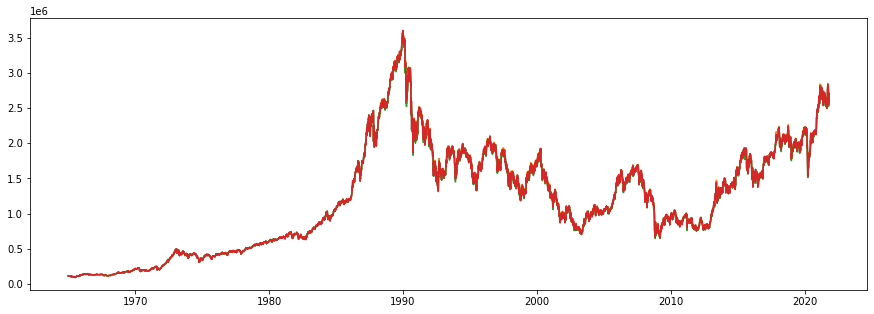

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# df[["Open", "High", "Low", "Close"]].plot(kind = "line")
plt.plot(df.index, df[["Open", "High", "Low", "Close"]])

In [128]:
#特徴量の追加１
#終値の前日比の追加（今日の終値 - 前日の終値）/前日の終値
df_shift = df.shift(1)

df["Close_ratio"] = (df["Close"] - df_shift["Close"]) / df_shift["Close"]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640
...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548


In [129]:
#特徴量の追加２
#始値と終値の差分
df["Body"] = df["Open"] - df["Close"]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN,0.000000
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985,0.000000
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133,0.000000
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543,0.000000
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640,0.000000
...,...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133,-26026.826172
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485,6323.242188
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548,-9087.221680


In [130]:
#不要データの削除
#祝日などで月曜ー金曜のデータがそろっていない週は無視する
list_weeks = []
list_weeks = df["weeks"].unique()
list_weeks

array([   0,    1,    2, ..., 2961, 2962, 2963], dtype=int64)

In [131]:
#各週ごとの日数を入力
df["week_days"] = 0

for i in list_weeks:
    df["week_days"][df["weeks"] == i] = len(df[df["weeks"] == i])

df

C:\Users\javie\AppData\Local\Temp\ipykernel_25904\771124249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week_days"][df["weeks"] == i] = len(df[df["weeks"] == i])


,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN,0.000000,4
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985,0.000000,4
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133,0.000000,4
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543,0.000000,4
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640,0.000000,3
...,...,...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133,-26026.826172,5
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485,6323.242188,4
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548,-9087.221680,4


In [132]:
df = df[df["week_days"] == 5]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-18,2,0,1.176304e+05,1.176304e+05,1.176304e+05,1.176304e+05,0,-0.013819,0.000000,5
1965-01-19,2,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,0,-0.001054,0.000000,5
1965-01-20,2,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,1,-0.001149,0.000000,5
1965-01-21,2,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0,0.001245,0.000000,5
1965-01-22,2,4,1.167193e+05,1.167193e+05,1.167193e+05,1.167193e+05,0,-0.006793,0.000000,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-11,2962,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0,0.016017,-48158.173828,5
2021-10-12,2962,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,0,-0.009390,21115.112305,5
2021-10-13,2962,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,1,-0.003200,-5072.685547,5


In [133]:
#金曜日のデータは目的データなので削除
df = df.drop(df[df.weekday == 4].index)
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-18,2,0,1.176304e+05,1.176304e+05,1.176304e+05,1.176304e+05,0,-0.013819,0.000000,5
1965-01-19,2,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,0,-0.001054,0.000000,5
1965-01-20,2,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,1,-0.001149,0.000000,5
1965-01-21,2,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0,0.001245,0.000000,5
1965-01-25,3,0,1.155991e+05,1.155991e+05,1.155991e+05,1.155991e+05,0,-0.009597,0.000000,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-07,2961,3,2.591398e+06,2.553737e+06,2.559102e+06,2.560235e+06,1,0.005425,-1132.221680,5
2021-10-11,2962,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0,0.016017,-48158.173828,5
2021-10-12,2962,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,0,-0.009390,21115.112305,5


In [134]:
#不要カラムの削除と並び替え
df = df[["weekday", "High", "Low", "Open", "Close", "Close_ratio", "Body", "Up"]]
df

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
1965-01-18,0,1.176304e+05,1.176304e+05,1.176304e+05,1.176304e+05,-0.013819,0.000000,0
1965-01-19,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,-0.001054,0.000000,0
1965-01-20,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,-0.001149,0.000000,1
1965-01-21,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0.001245,0.000000,0
1965-01-25,0,1.155991e+05,1.155991e+05,1.155991e+05,1.155991e+05,-0.009597,0.000000,0
...,...,...,...,...,...,...,...,...
2021-10-07,3,2.591398e+06,2.553737e+06,2.559102e+06,2.560235e+06,0.005425,-1132.221680,1
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0


- 2018-2020年を学習データ

- 2021年以降を検証データとする

In [135]:
#学習データの抜出
df_train = df["2018-01-01" : "2020-12-31"]
df_train

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2018-01-15,0,2.204577e+06,2.190864e+06,2.204088e+06,2.193626e+06,0.002581,10461.713867,1
2018-01-16,1,2.216492e+06,2.192419e+06,2.194208e+06,2.215542e+06,0.009991,-21334.257812,0
2018-01-17,2,2.209976e+06,2.195873e+06,2.199966e+06,2.207821e+06,-0.003485,-7855.092773,0
2018-01-18,3,2.227809e+06,2.192201e+06,2.227301e+06,2.198112e+06,-0.004398,29189.350586,1
2018-01-22,0,2.203011e+06,2.192047e+06,2.201300e+06,2.203011e+06,0.000347,-1710.346680,1
...,...,...,...,...,...,...,...,...
2020-12-17,3,2.482982e+06,2.467556e+06,2.473866e+06,2.479617e+06,0.001841,-5750.717773,0
2020-12-21,0,2.488774e+06,2.454361e+06,2.482154e+06,2.471084e+06,-0.001830,11070.371094,0
2020-12-22,1,2.464199e+06,2.438454e+06,2.456738e+06,2.445366e+06,-0.010407,11371.899414,1


In [136]:
#検証データの抜出
df_val = df["2021-01-01" : ]
df_val

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-01-04,0,2.553195e+06,2.501415e+06,2.550740e+06,2.521400e+06,-0.006770,29340.024414,0
2021-01-05,1,2.523380e+06,2.504295e+06,2.511503e+06,2.512173e+06,-0.003659,-670.625000,0
2021-01-06,2,2.515667e+06,2.497702e+06,2.507014e+06,2.502674e+06,-0.003781,4339.189453,1
2021-01-07,3,2.555288e+06,2.528993e+06,2.528993e+06,2.542837e+06,0.016048,-13844.467773,1
2021-01-18,0,2.622372e+06,2.600317e+06,2.612078e+06,2.612405e+06,-0.009712,-326.640625,1
...,...,...,...,...,...,...,...,...
2021-10-07,3,2.591398e+06,2.553737e+06,2.559102e+06,2.560235e+06,0.005425,-1132.221680,1
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0


In [137]:
#検証データを説明変数（X_train）と目的変数（y_train）に分ける
X_train = df_train[["weekday", "High", "Low", "Open", "Close", "Close_ratio", "Body"]]
y_train = df_train["Up"]

print(X_train)
print(y_train)

            weekday          High           Low          Open         Close  \
Date                                                                          
2018-01-15        0  2.204577e+06  2.190864e+06  2.204088e+06  2.193626e+06   
2018-01-16        1  2.216492e+06  2.192419e+06  2.194208e+06  2.215542e+06   
2018-01-17        2  2.209976e+06  2.195873e+06  2.199966e+06  2.207821e+06   
2018-01-18        3  2.227809e+06  2.192201e+06  2.227301e+06  2.198112e+06   
2018-01-22        0  2.203011e+06  2.192047e+06  2.201300e+06  2.203011e+06   
...             ...           ...           ...           ...           ...   
2020-12-17        3  2.482982e+06  2.467556e+06  2.473866e+06  2.479617e+06   
2020-12-21        0  2.488774e+06  2.454361e+06  2.482154e+06  2.471084e+06   
2020-12-22        1  2.464199e+06  2.438454e+06  2.456738e+06  2.445366e+06   
2020-12-23        2  2.459132e+06  2.443363e+06  2.458690e+06  2.453543e+06   
2020-12-24        3  2.475719e+06  2.460987e+06  2.4

In [138]:
#検証データを説明変数（X_val）と目的変数（Y_val）に分ける
X_val = df_val[["weekday", "High", "Low", "Open", "Close", "Close_ratio", "Body"]]
Y_val = df_val["Up"]

print(X_val)
print(Y_val)

            weekday          High           Low          Open         Close  \
Date                                                                          
2021-01-04        0  2.553195e+06  2.501415e+06  2.550740e+06  2.521400e+06   
2021-01-05        1  2.523380e+06  2.504295e+06  2.511503e+06  2.512173e+06   
2021-01-06        2  2.515667e+06  2.497702e+06  2.507014e+06  2.502674e+06   
2021-01-07        3  2.555288e+06  2.528993e+06  2.528993e+06  2.542837e+06   
2021-01-18        0  2.622372e+06  2.600317e+06  2.612078e+06  2.612405e+06   
...             ...           ...           ...           ...           ...   
2021-10-07        3  2.591398e+06  2.553737e+06  2.559102e+06  2.560235e+06   
2021-10-11        0  2.643776e+06  2.580132e+06  2.587925e+06  2.636083e+06   
2021-10-12        1  2.633371e+06  2.605390e+06  2.632446e+06  2.611331e+06   
2021-10-13        2  2.623762e+06  2.589395e+06  2.597903e+06  2.602976e+06   
2021-10-14        3  2.643343e+06  2.611646e+06  2.6

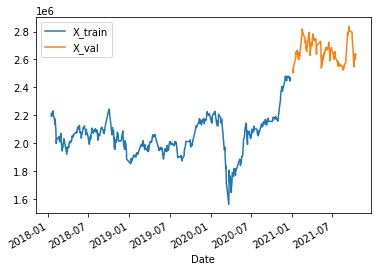

In [139]:
#X - 説明
#Y - 目的
#train - 学習
#val - 検証
X_train["Close"].plot(kind = "line")
X_val["Close"].plot(kind = "line")

plt.legend(["X_train", "X_val"])

plt.show()

In [140]:
#データを整える
from sklearn.preprocessing import StandardScaler
import numpy as np

def std_to_np(df):
    df_list = []
    df = np.array(df)
    #4行ずつループ
    for i in range(0, len(df) - 3, 4):
        df_s = df[i:i + 4]
        scl = StandardScaler()
        #標準化
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [141]:
#X - 説明
#Y - 目的
#train - 学習
#val - 検証
#学習データと検証データを4行ずつに分割＆整形する
X_train_np_array = std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

print(X_train_np_array.shape)
print(X_val_np_array.shape)

(120, 4, 7)
(33, 4, 7)


In [144]:
#学習データ、検証データから週の4日目（木曜日）のデータだけを抜き出す
#3から4までを抜き出す
y_train_new = y_train[3::4]
y_val_new = Y_val[3::4]

print(len(y_train_new))
print(len(y_val_new))

120
33


In [146]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [147]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [148]:
# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

In [149]:
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices], X_train_np_array[valid_indices]
    y_train, y_valid = y_train_new[train_indices], y_train_new[valid_indices]

    # LSTM構築とコンパイル関数にX_trainを渡し、変数modelに代入
    model = lstm_comp(X_train)

    # モデル学習
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # 予測
    y_valid_pred = model.predict(X_valid)

    # 予測結果の2値化
    y_valid_pred = np.where(y_valid_pred < 0.5, 0, 1)

    # 予測精度の算出と表示
    score = accuracy_score(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')

    # 予測精度スコアをリストに格納
    valid_scores.append(score)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6979 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6907 - accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6887 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6830 - accuracy: 0.7083
Epoch 5/10
1/1 [==============================] - 0s 62ms/step - loss: 0.6822 - accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 78ms/step - loss: 0.6768 - accuracy: 0.7083
Epoch 7/10
1/1 [==============================] - 0s 64ms/step - loss: 0.6697 - accuracy: 0.6250
Epoch 8/10
1/1 [==============================] - 0s 63ms/step - loss: 0.6721 - accuracy: 0.5417
Epoch 9/10
1/1 [==============================] - 0s 50ms/step - loss: 0.6720 - accuracy: 0.6250
Epoch 10/10
1/1 [==============================] - 1s 1s/step
fold 0 MAE: 0.5
Epoch 1/10
1/1 [==============================] - 3

In [150]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

valid_scores: [0.5, 0.7083333333333334, 0.5416666666666666, 0.3333333333333333]
CV score: 0.5208333333333334


In [152]:
# LSTM構築とコンパイル関数にX_train_np_arrayを渡し、変数modelに代入
model = lstm_comp(X_train_np_array)

# モデルの学習の実行
result = model.fit(X_train_np_array, y_train_new, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 2s 18ms/step - loss: 0.6964 - accuracy: 0.5417
Epoch 2/10
2/2 [==============================] - 0s 21ms/step - loss: 0.6923 - accuracy: 0.5167
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 0.6918 - accuracy: 0.5167
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 0.6896 - accuracy: 0.5250
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 0.6864 - accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 0s 23ms/step - loss: 0.6874 - accuracy: 0.6167
Epoch 7/10
2/2 [==============================] - 0s 19ms/step - loss: 0.6882 - accuracy: 0.5667
Epoch 8/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6841 - accuracy: 0.6167
Epoch 9/10
2/2 [==============================] - 0s 25ms/step - loss: 0.6778 - accuracy: 0.6250
Epoch 10/10
2/2 [==============================] - 0s 25ms/step - loss: 0.6800 - accuracy: 0.5917


In [153]:
# 作成したモデルより検証データを用いて予測を行う
pred = model.predict(X_val_np_array)
pred[:10]

2/2 [==============================] - 0s 6ms/step


array([[0.4875539 ],
       [0.5206387 ],
       [0.51551807],
       [0.53619266],
       [0.54651743],
       [0.5373485 ],
       [0.48502186],
       [0.5089558 ],
       [0.46287817],
       [0.5412754 ]], dtype=float32)

In [154]:
# 予測結果を0もしくは1に修正（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
pred = np.where(pred < 0.5, 0, 1)

# 修正した予測結果の先頭10件を確認
pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [155]:
# 実際の結果から予測値の正解率を計算する
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_true=y_val_new, y_pred=pred))

accuracy =  0.5151515151515151


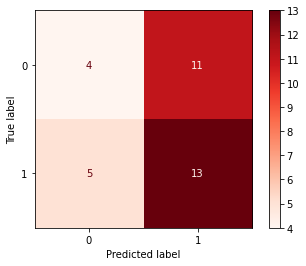

In [156]:
# 混同行列生成のためconfusion_matrixをインポート
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混同行列を表示
cm = confusion_matrix(y_val_new, pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)